In [107]:
import requests

In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [109]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Import Image Predictions Data 

In [110]:
image_pred = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [111]:
image_pred.status_code

200

Save image predictions data to a tsv file.

In [112]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(image_pred.content)

## Import Tweet Info

In [113]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [114]:
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

In [115]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')

In [116]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [124]:
tweet_ids = df_ta.tweet_id.values
len(tweet_ids)

2356

`Note`: Initial attempt at downloading tweet data failed after 900 ID's, due to rate limit. Modified tweepy api to "wait on rate limit". Then resumed downloading. This time it was successful.

In [118]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 1800
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'a') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids[900:]: # Initial try: twitter rate limit mechanism limits each session to 900
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'tweet_ids' is not defined

`Results`: only 2 ID's are missing. {754011816964026368: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}

Check data from 3 sources by first loading them into data frames.

In [119]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [120]:
df_ta.tweet_id.nunique()

2356

In [121]:
df_ip = pd.read_csv('image_predictions.tsv',sep = '\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [122]:
df_ip.tweet_id.nunique()

2075

In [123]:
df_tj = pd.read_json('tweet_json.txt', lines = True)
df_tj.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tj.info()

In [ ]:
#identify columns of interest in df_tj

In [ ]:
df_tj.describe()

In [ ]:
df_tj[df_tj['id']!=df_tj['id_str'].astype('int64')]

Quality issue: 825 entries in tweet_json.txt have 'id' and 'id_str' mismatch. Also 'id_str' is int type, not str type.

In [125]:
# select to keep only retweet_cnt and favorite_cnt
df_tj.drop(columns = df_tj.columns.difference(['id', 'retweet_count', 'favorite_count']), inplace = True)

## Add retweet count and favorit count to the data frame

In [234]:
df = pd.merge(df_ta, df_tj, left_on = 'tweet_id', right_on = 'id')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193,7847,36815
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426,5812,31697
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864,3847,23875
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,891689557279858688,8013,40140
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,891327558926688256,8657,38337


In [235]:
df.drop(columns = 'id', inplace = True)

## Combine with dog image predictions data
Only keep original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets
Goal: assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

In [236]:
# combine with image dataset, only keep those that have images.
df = pd.merge(df, df_ip, how = 'inner', on = 'tweet_id' )
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [238]:
#save combined dataset to a file
df.to_csv('combine_tweet_data.csv', index = False)

In [239]:
df = pd.read_csv('combine_tweet_data.csv')

In [240]:
#remove retweets
df.drop(index = df[df['retweeted_status_id'].isna() == False].index, inplace = True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
retweet_count                 1987 non

In [242]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,2.300000e+01,2.300000e+01,0.0,0.0,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,6.978112e+17,4.196984e+09,NaN,NaN,12.280825,10.533971,2503.533971,8411.970307,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,4.359384e+16,0.000000e+00,NaN,NaN,41.570741,7.333532,4479.572143,12374.200684,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,560.000000,1807.000000,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1209.000000,3782.000000,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,2845.500000,10486.000000,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [243]:
df.rating_denominator.value_counts()

10     1969
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [244]:
# remove ratings with denominator other than 10
df.drop(index = df[df.rating_denominator!=10].index, inplace = True)

In [245]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.969000e+03,2.200000e+01,2.200000e+01,0.0,0.0,1969.000000,1969.0,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03,1.969000e+03
mean,7.357958e+17,6.984288e+17,4.196984e+09,NaN,NaN,11.696293,10.0,2501.646521,8422.094464,1.203149,0.593015,1.348139e-01,6.031347e-02
std,6.755645e+16,4.451659e+16,0.000000e+00,NaN,NaN,40.923774,0.0,4479.289040,12388.780233,0.561620,0.272091,1.006903e-01,5.079632e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,10.0,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757404e+17,6.724855e+17,4.196984e+09,NaN,NaN,10.000000,10.0,559.000000,1794.000000,1.000000,0.360428,5.421470e-02,1.619070e-02
50%,7.081494e+17,6.756022e+17,4.196984e+09,NaN,NaN,11.000000,10.0,1206.000000,3804.000000,1.000000,0.587101,1.181810e-01,4.965610e-02
75%,7.878106e+17,7.032024e+17,4.196984e+09,NaN,NaN,12.000000,10.0,2862.000000,10488.000000,1.000000,0.843799,1.955580e-01,9.193000e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,10.0,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [246]:
df.rating_numerator.value_counts()

12      448
10      418
11      396
13      257
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [247]:
#remove rating_numerator > 20
df.drop(index = df[df.rating_numerator>20].index, inplace = True)

In [248]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.964000e+03,2.200000e+01,2.200000e+01,0.0,0.0,1964.000000,1964.0,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358024e+17,6.984288e+17,4.196984e+09,NaN,NaN,10.542770,10.0,2498.080957,8414.622200,1.203666,0.593261,1.349405e-01,6.032184e-02
std,6.759778e+16,4.451659e+16,0.000000e+00,NaN,NaN,2.185886,0.0,4481.839019,12396.019224,0.562241,0.272049,1.007694e-01,5.083697e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,10.0,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757330e+17,6.724855e+17,4.196984e+09,NaN,NaN,10.000000,10.0,558.000000,1794.000000,1.000000,0.360361,5.419487e-02,1.616933e-02
50%,7.081401e+17,6.756022e+17,4.196984e+09,NaN,NaN,11.000000,10.0,1201.000000,3782.000000,1.000000,0.587357,1.186345e-01,4.952715e-02
75%,7.880674e+17,7.032024e+17,4.196984e+09,NaN,NaN,12.000000,10.0,2856.750000,10486.500000,1.000000,0.843827,1.956673e-01,9.198323e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,14.000000,10.0,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
retweet_count                 1964 non

In [250]:
df.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

In [251]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [252]:
# remove 'in_reply_to' fields? can't do anything with the 22 non-null items
df[df.in_reply_to_user_id.isna()==False].iloc[0].expanded_urls

'https://twitter.com/dog_rates/status/863079547188785154/photo/1'

In [253]:
df.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

In [211]:
df.iloc[3].expanded_urls

'https://twitter.com/dog_rates/status/891689557279858688/photo/1'

In [254]:
df.doggo.value_counts()

None     1891
doggo      73
Name: doggo, dtype: int64

In [255]:
df.floofer.value_counts()

None       1956
floofer       8
Name: floofer, dtype: int64

In [256]:
df.pupper.value_counts()

None      1753
pupper     211
Name: pupper, dtype: int64

In [257]:
df.puppo.value_counts()

None     1941
puppo      23
Name: puppo, dtype: int64

In [258]:
#doggo, ....puppo names should be combined into 1 column
type_df = pd.melt(df, id_vars = ['tweet_id'], value_vars= ['pupper', 'puppo', 'floofer', 'doggo'], var_name = 'type')
type_df

,tweet_id,type,value
0,892420643555336193,pupper,None
1,892177421306343426,pupper,None
2,891815181378084864,pupper,None
3,891689557279858688,pupper,None
4,891327558926688256,pupper,None
...,...,...,...
7851,666049248165822465,doggo,None
7852,666044226329800704,doggo,None
7853,666033412701032449,doggo,None
7854,666029285002620928,doggo,None


In [259]:
type_df.value.value_counts()

None       7541
pupper      211
doggo        73
puppo        23
floofer       8
Name: value, dtype: int64

In [260]:
type_df.drop(index = type_df[type_df.value =='None'].index, inplace = True)

In [261]:
type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 28 to 6803
Data columns (total 3 columns):
tweet_id    315 non-null int64
type        315 non-null object
value       315 non-null object
dtypes: int64(1), object(2)
memory usage: 9.8+ KB


In [262]:
type_df.value.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: value, dtype: int64

In [263]:
type_df.type.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: type, dtype: int64

In [264]:
type_df.tail()

,tweet_id,type,value
6724,732375214819057664,doggo,doggo
6747,727644517743104000,doggo,doggo
6760,724771698126512129,doggo,doggo
6779,719991154352222208,doggo,doggo
6803,716080869887381504,doggo,doggo


In [265]:
type_df.drop(columns = 'value', inplace = True)

In [266]:
df.to_csv('df_1.csv', index = False)

In [289]:
df = pd.read_csv('df_1.csv')

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 25 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null floa

In [284]:
type_df[type_df.tweet_id.duplicated()==True]

,tweet_id,type
6039,855851453814013952,doggo
6045,854010172552949760,doggo
6227,817777686764523521,doggo
6283,808106460588765185,doggo
6305,802265048156610565,doggo
6311,801115127852503040,doggo
6395,785639753186217984,doggo
6535,759793422261743616,doggo
6585,751583847268179968,doggo
6675,741067306818797568,doggo


In [285]:
type_df[type_df['tweet_id']==855851453814013952]

,tweet_id,type
2111,855851453814013952,puppo
6039,855851453814013952,doggo


In [286]:
len(type_df[type_df.tweet_id.duplicated()==True])

11

11 entries in dog types have duplicated types: 'doggo' and one other type. Since 'doggo' is a more generic name, remove these duplicates with 'doggo' type.

In [287]:
type_df.drop_duplicates(subset = 'tweet_id', inplace = True)
type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 28 to 6803
Data columns (total 2 columns):
tweet_id    304 non-null int64
type        304 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [288]:
type_df.type.value_counts()

pupper     211
doggo       62
puppo       23
floofer      8
Name: type, dtype: int64

In [290]:
df = pd.merge(df, type_df, how = 'left', on = 'tweet_id')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [268]:
df.type.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: type, dtype: int64

In [296]:
# remove 'doggo', ... 'pupper' columns
df.drop(columns = ['doggo', 'pupper', 'floofer', 'puppo'], inplace = True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool

In [294]:
df.name.value_counts().head(20)

None       586
Cooper      10
Oliver      10
Charlie     10
Tucker       9
Penny        9
Lucy         9
Winston      8
Sadie        8
Toby         7
Lola         7
Daisy        7
the          7
Jax          6
Koda         6
Bo           6
Bella        6
Stanley      6
Milo         5
Louis        5
Name: name, dtype: int64

In [390]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bo',
 'Bob',
 'Bobb'

In [412]:
mis_list = ['a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not',
            'officially', 'one', 'quite', 'space', 'such', 'the', 'unacceptable', 'very']

In [413]:
#replace erroneous dog names with 'None'
df.name.replace(to_replace = mis_list , value = 'None', inplace = True)

In [414]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bo',
 'Bob',
 'Bobb'

In [302]:
# rating_denominator is no longer needed, since it's 10 always
df.drop(columns = 'rating_denominator', inplace = True)

In [415]:
df.to_csv('df_2.csv', index = False)

In [411]:
df = pd.read_csv('df_2.csv')

In [304]:
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358024e+17,10.542770,2498.080957,8414.622200,1.203666,0.593261,1.349405e-01,6.032184e-02
std,6.759778e+16,2.185886,4481.839019,12396.019224,0.562241,0.272049,1.007694e-01,5.083697e-02
min,6.660209e+17,0.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757330e+17,10.000000,558.000000,1794.000000,1.000000,0.360361,5.419487e-02,1.616933e-02
50%,7.081401e+17,11.000000,1201.000000,3782.000000,1.000000,0.587357,1.186345e-01,4.952715e-02
75%,7.880674e+17,12.000000,2856.750000,10486.500000,1.000000,0.843827,1.956673e-01,9.198323e-02
max,8.924206e+17,14.000000,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


find out rating vs. retweet_count and favorite_count relationship


In [342]:
metrics_3 = ['rating_numerator', 'retweet_count', 'favorite_count']
corr_3 = df[metrics_3].corr()
corr_3

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.291679,0.384849
retweet_count,0.291679,1.000000,0.928821
favorite_count,0.384849,0.928821,1.000000


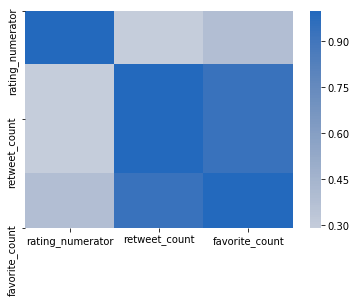

In [352]:
sb.heatmap(corr_3, cmap = 'vlag_r', center = 0);

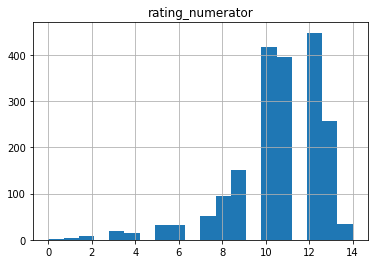

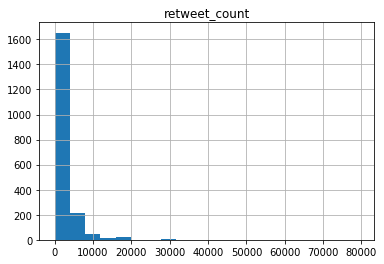

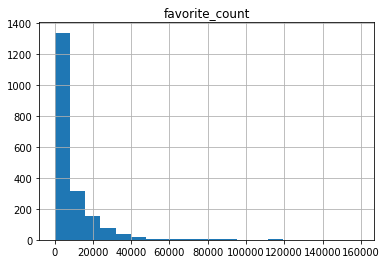

In [309]:
#first plot them indivicually
for metric in metrics_3:
    df.hist(column = metric, bins = 20 )

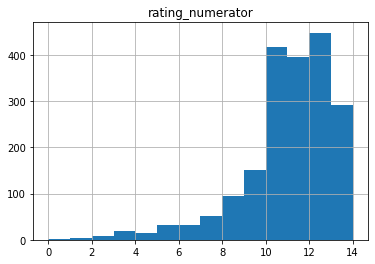

In [311]:
#need to adjust plots
df.hist('rating_numerator', bins = 14);

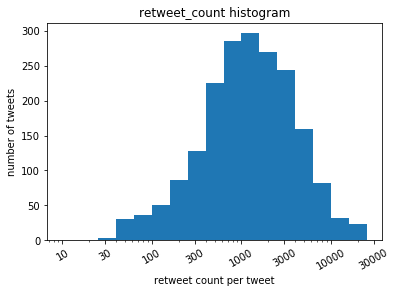

In [338]:
t_bins = 10**np.arange(1, 4.51, 0.2)
x_tks = [ 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.hist(df['retweet_count'], bins = t_bins )
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


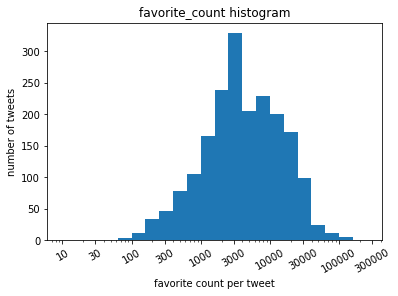

In [357]:
f_bins = 10**np.arange(1, 5.51, 0.2)
f_tks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.hist(df['favorite_count'], bins = f_bins )
plt.title('favorite_count histogram')
plt.xlabel('favorite count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


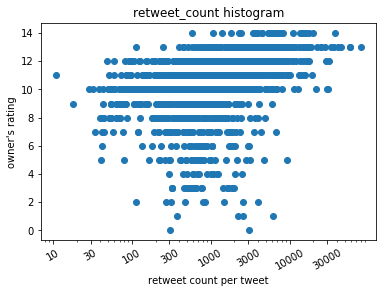

In [339]:
plt.scatter(data = df, x = 'retweet_count', y = 'rating_numerator')
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


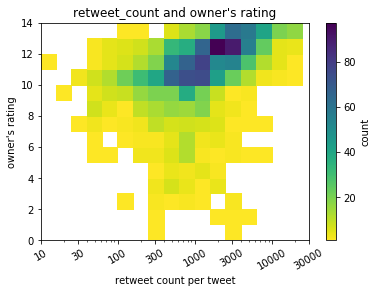

In [362]:
plt.hist2d(data = df, x = 'retweet_count', y = 'rating_numerator', bins = [t_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("retweet_count and owner's rating")
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.colorbar(label = 'count')
plt.xticks(x_tks, x_tks, rotation = 30);


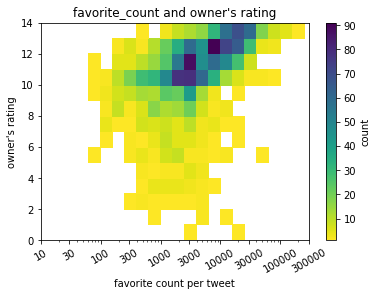

In [363]:
plt.hist2d(data = df, x = 'favorite_count', y = 'rating_numerator', bins = [f_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and owner's rating" )
plt.xlabel('favorite count per tweet')
plt.ylabel("owner's rating")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


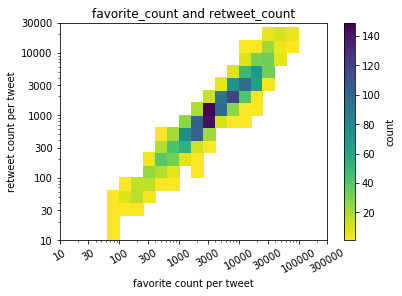

In [365]:
plt.hist2d(data = df, x = 'favorite_count', y = 'retweet_count', bins = [f_bins, t_bins],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and retweet_count" )
plt.xlabel('favorite count per tweet')
plt.ylabel("retweet count per tweet")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


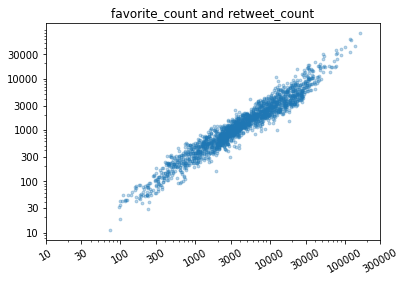

In [371]:
plt.scatter(data = df, x = 'favorite_count', y = 'retweet_count' ,alpha = 0.3,s =8)
plt.title("favorite_count and retweet_count" )
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


Take a look at dog breed prediction

In [416]:
df.p1.value_counts().head(20)

golden_retriever             135
Labrador_retriever            90
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       39
toy_poodle                    37
Pomeranian                    37
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                19
Shetland_sheepdog             18
Staffordshire_bullterrier     18
Eskimo_dog                    18
Name: p1, dtype: int64

In [374]:
df.p1_dog.value_counts()

True     1452
False     512
Name: p1_dog, dtype: int64

In [419]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p1_dog==False].index ,'p1'] = np.nan

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 21 columns):
tweet_id            1964 non-null int64
timestamp           1964 non-null object
source              1964 non-null object
text                1964 non-null object
expanded_urls       1964 non-null object
rating_numerator    1964 non-null int64
name                1964 non-null object
retweet_count       1964 non-null int64
favorite_count      1964 non-null int64
jpg_url             1964 non-null object
img_num             1964 non-null int64
p1                  1452 non-null object
p1_conf             1964 non-null float64
p1_dog              1964 non-null bool
p2                  1964 non-null object
p2_conf             1964 non-null float64
p2_dog              1964 non-null bool
p3                  1964 non-null object
p3_conf             1964 non-null float64
p3_dog              1964 non-null bool
type                304 non-null object
dtypes: bool(3), float64(3), int64(5), ob

In [421]:
df.drop(columns = 'p1_dog', inplace = True)

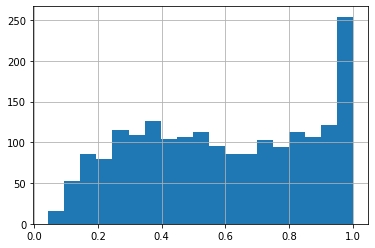

In [405]:
df.p1_conf.hist(bins = 19);

In [423]:
df[df.p1_conf<=0.15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,7847,36815,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,bagel,0.085851,False,banana,0.076110,False,NaN
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,None,10909,44108,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,0.130432,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
55,880095782870896641,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,None,4025,26348,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,NaN
125,861288531465048066,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13,None,3989,16746,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,NaN,0.144712,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,NaN
182,847116187444137987,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,https://twitter.com/dog_rates/status/847116187...,11,None,3193,21557,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,NaN,0.128935,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,Philippe,259,504,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,NaN
1901,667165590075940865,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,https://twitter.com/dog_rates/status/667165590...,10,Churlie,1097,2611,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,miniature_pinscher,0.140173,Rottweiler,0.134094,True,beagle,0.081900,True,NaN
1926,666644823164719104,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,Jimothy,76,224,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True,NaN
1934,666418789513326592,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,Walter,43,114,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,papillon,0.148258,True,Chihuahua,0.142860,True,NaN


Very low confidence (<15%) in dog breed prediction is not reliable, and those predictions should be set to NaN. 

In [424]:
df.loc[df[df.p1_conf<=0.15].index ,'p1'] = np.nan

In [433]:
top_10_b = list(df.p1.value_counts().head(10).index)
top_10_b

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'malamute']

In [456]:
top_df = df[df.p1.isin(top_10_b)].copy()

In [ ]:
breed_t = pd.api.types.CategoricalDtype(categories = top_10_b, ordered = True)
top_df.p1 = top_df.p1.astype(breed_t)

In [472]:
top_10_b_2 = []
for br in top_10_b:
    top_10_b_2.append(br.replace('_',' '))
top_10_b_2

['golden retriever',
 'Labrador retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy poodle',
 'Pomeranian',
 'malamute']

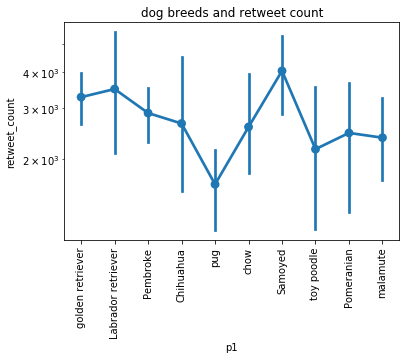

In [473]:
ax = sb.pointplot(data = top_df, x = 'p1', y = 'retweet_count')
ax.set_xticklabels(top_10_b_2, rotation = 90)
plt.yscale('log')
plt.title('dog breeds and retweet count');

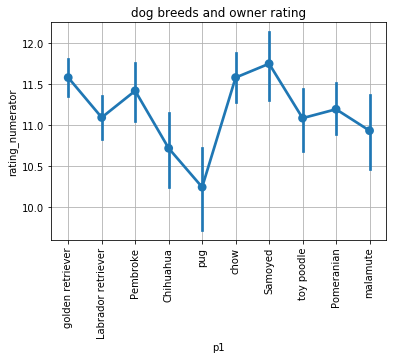

In [474]:
ax = sb.pointplot(data = top_df, x = 'p1', y = 'rating_numerator')
ax.set_xticklabels(top_10_b_2, rotation = 90)
#plt.ylim([0,14])
plt.grid('True')
plt.title('dog breeds and owner rating');

Samoyed is the most highly rated breed for owners, and also most retweeted breed among tweeters.